# Hands-on with Qiskit: Hello World - Qiskit Patterns

In this notebook you will walk through a Qiskit Patterns workflow, and use Qiskit's [Sampler primitive](https://docs.quantum.ibm.com/guides/get-started-with-primitives).

This tutorial partially involves content from [IBM Quantum Documentation: Hello World](https://docs.quantum.ibm.com/guides/hello-world).

Useful links:
1. Please [create an IBM Cloud account](https://cloud.ibm.com/registration?utm_content=quantum-trial&target=https%3A%2F%2Fquantum.cloud.ibm.com&error_uri=) to access the [IBM Quantum Platform](https://quantum.cloud.ibm.com/).
    - For those with a university email: [obtain a feature code here to extend your free trial period](https://github.com/academic-initiative/documentation/blob/main/academic-initiative/how-to/How-to-request-and-IBM-Cloud-Feature-Code/readme.md).
    - For those without a university email: [instructions to active your account](https://cloud.ibm.com/docs/account?topic=account-upgrading-account). Fully activate your account by registering a credit card. Your credit card is not charged in this process or at random after registering. This activation allows you to continue to access your free resources in the IBM Cloud and IBM Quantum platform after the trial period ends (30 days).
2. We will use a cloud-based platform to set up a coding environment. You may either use [QBraid](https://www.qbraid.com/) or [Google Colab](https://colab.google/).
3. After this notebook, we will be looking at the [Quantum Teleportation protocol](https://quantum.cloud.ibm.com/learning/en/modules/computer-science/quantum-teleportation).

More links - Qiskit community and further learning resources:
- [Grok sphere](https://javafxpert.github.io/grok-bloch/)
- [IBM Quantum Composer](https://quantum.cloud.ibm.com/composer)
- [IBM Quantum Learning](https://quantum.cloud.ibm.com/learning/en)
- [Qiskit Global Summer School 2025 lectures](https://www.youtube.com/watch?v=maJaB4-WfFg&list=PLOFEBzvs-VvoIfbpOb_geVnwFmbW6ij0m)
- [Qiskit v2.X Certification](https://www.ibm.com/training/certification/ibm-certified-quantum-computation-using-qiskit-v2x-developer-associate-C9008400)
- [Qiskit advocate program](https://www.ibm.com/quantum/blog/qiskit-advocate-program)
- [Quantum summer internships](https://www.ibm.com/au-en/careers/search?field_keyword_18[0]=Internship&q=quantum)
- [Qiskit YouTube](https://www.youtube.com/qiskit)- [Qiskit Ecosystem](https://www.ibm.com/quantum/ecosystem)- [Qiskit addons](https://quantum.cloud.ibm.com/docs/en/guides/addons)

## Install Qiskit <a id="install-qiskit"></a>



You can use an online jupyter lab environment (see guide [Online lab environments](quantum.cloud.ibm.com/docs/en/guides/online-lab-environments)) or install Qiskit locally.

Follow the Qiskit installation guide [Install the Qiskit SDK and the Qiskit Runtime client](https://quantum.cloud.ibm.com/docs/en/guides/install-qiskit) to complete the following steps:

	- Install Qiskit including the  extra visualization packages: `pip install qiskit[visualization]`

	- Install qiskit-ibm-runtime: `pip install qiskit-ibm-runtime`

	- Install jupyter: `pip install jupyter`

Check that the version of Python you are using in your environment is python>=3.10, to make sure that it is compatible with the latest Qiskit version:

In [ ]:
from platform import python_version

print(python_version())

If you need to upgrade Python and are unsure how to do it, please refer to this guide on how to upgrade Python depending on your OS: [How to update Python](https://4geeks.com/how-to/how-to-update-python-version)

In [ ]:
%pip install qiskit[visualization]
%pip install qiskit-ibm-runtime
%pip install
%pip install qiskit-aer

### Make the necessary imports

Let's make the necessary imports for this tutorial.

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import qiskit_ibm_runtime
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from IPython.display import display, Latex


## Set up your IBM Quantum Platform account <a id="setting-ibm-cloud"></a>

In order to execute quantum circuits on real hardware, you will need an IBM Cloud account.

Follow the instructions in this guide [Set up your IBM Cloud account](https://quantum.cloud.ibm.com/docs/en/guides/cloud-setup) to complete the following steps:

1. Set up an IBM Cloud account if you do not already have one.
2. Log into or create an [IBM Quantum Platform](https://quantum.cloud.ibm.com/) account with an IBMid.
2. Access your IBM Quantum Platform dashboard, **create your API token**, and copy it to a secure location. (See first reference image below.)
3. In the code cell following the reference images, replace `deleteThisAndPasteYourAPIKeyHere` with your API key.
4. Go to the Instances page from the ☰ main menu and **create your instance**. If you are not part of a Network institution, choose the open plan. (See second reference image below.)
5. After the instance is created, copy its associated CRN code. (CRN stands for _Cloud Resource Names_) You may need to refresh to see the instance.
6.  In the code cell following the reference images, replace `deleteThisAndPasteYourCRNHere` with your CRN code.


 **Note:** Treat your API key as you would a secure password. Refer to the [Set up your IBM Cloud account](https://quantum.cloud.ibm.com/docs/guides/cloud-setup#cloud-save) guide for more information about using your API key in both secure and untrusted environments.




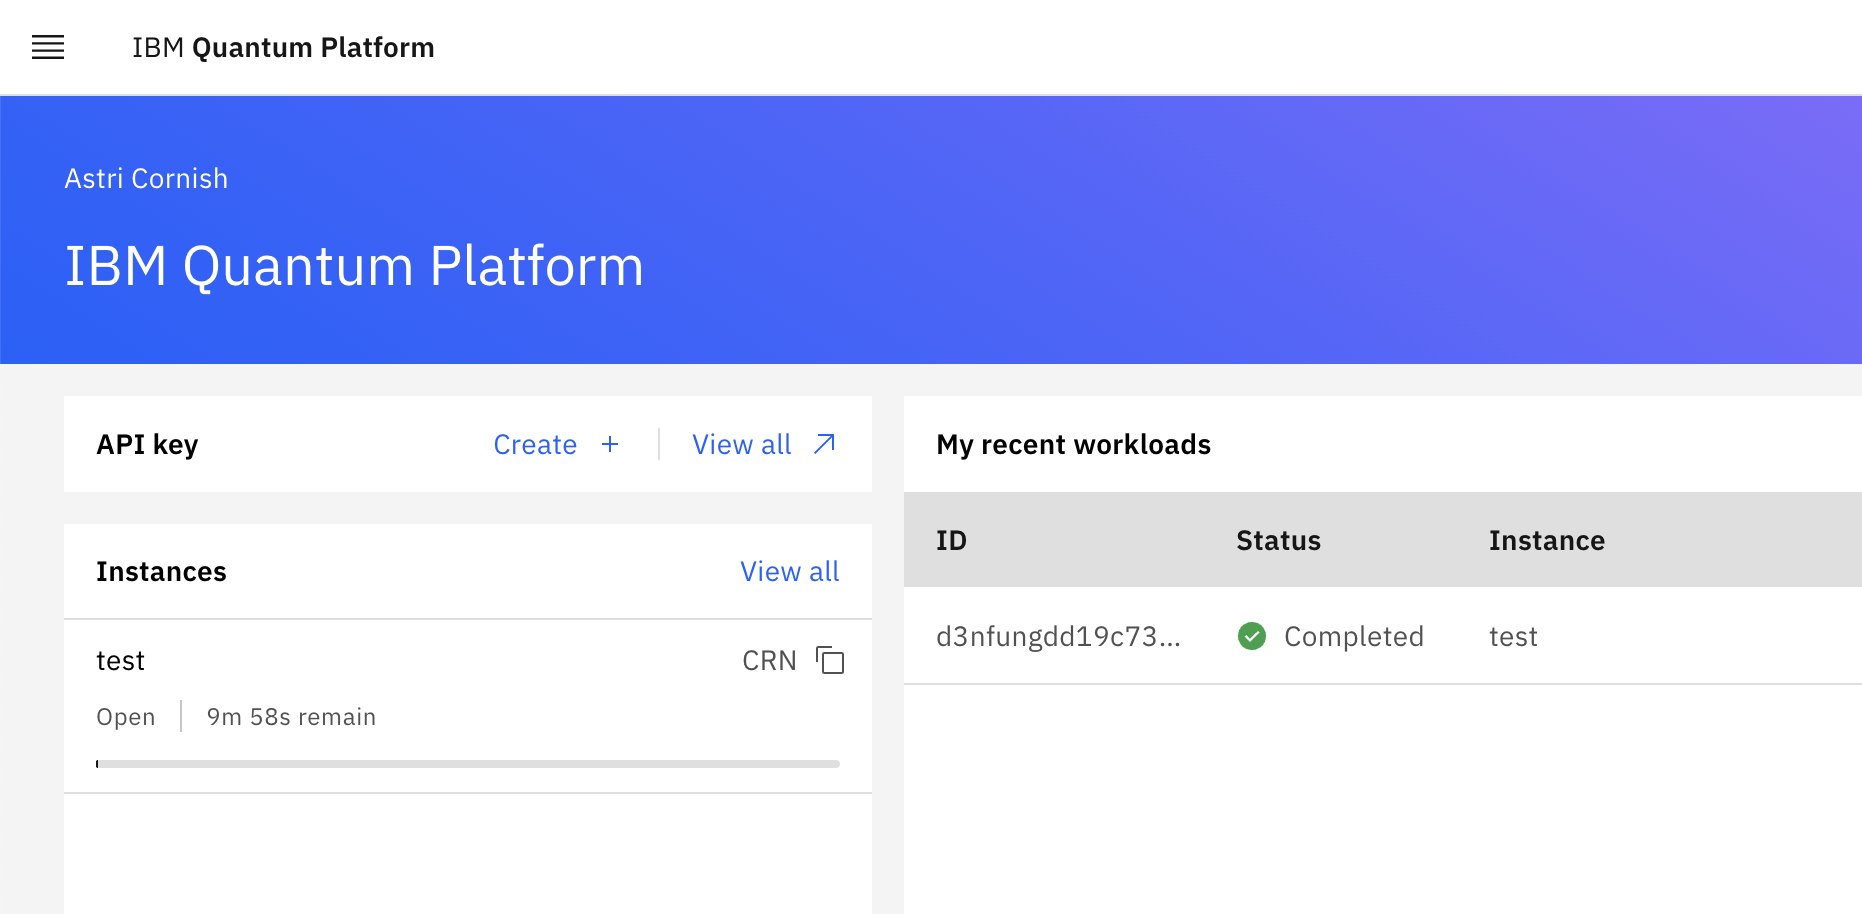

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
# Save your API key to access real devices

your_api_key = "your_api_key"
your_crn = "your_crn"


QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token=your_api_key,
    instance=your_crn,
    set_as_default=True,
    overwrite=True,
)



## Create and run a simple quantum algorithm using the Qiskit pattern framework <a id="qiskit-pattern"></a>


The Qiskit pattern conceptual framework can be considered the anatomy of a quantum algorithm.

The four steps to writing a quantum program using Qiskit patterns are:

1.  Map the problem to a quantum-native format.

2.  Optimize the circuits and operators.

3.  Execute using a Qiskit primitive function.

4.  Analyze the results.

### Step 1. Map the problem to a quantum-native format

In a quantum program, *quantum circuits* are the native format in which to represent quantum instructions, and *operators* represent the observables to be measured. When creating a circuit, you'll usually create a new [`QuantumCircuit`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit-class) object, then add instructions to it in sequence.


### Demonstration: Building basic quantum circuits in Qiskit <a id="build-circuits"></a>

Let's try building some simple circuits with Qiskit.

In [ ]:
# Simple quantum circuit with two qubits and two classical bits

# Create quantum circuit with 2 qubits and 2 classical bits
qc = 

# Add gates to your circuit
qc.

# Draw the output using MatPlotLib
qc.draw(output='mpl')

In [ ]:
# Quantum circuit with a Quantum Register named 'qr' that has two qubits, and a Classical Register named 'cr' with two classical bits

# Create a quantum register with 2 qubits, register label is 'qr'
qreg = 

# Create a classical register with 2 qubits, register label is 'cr'
creg = 

# Create a quantum circuit with registers qreg and creg
qc = 

# Add gates to your registers
qc.

# Draw the quantum circuit
qc.draw(output='mpl')

### Exercise: Building basic quantum circuits in Qiskit <a id="build-circuits"></a>

<div class="alert alert-success">

Create a circuit for the Bell state $\frac{|00\rangle + |11\rangle}{\sqrt{2}}$

</div>


In [ ]:
# Create a new circuit with two qubits
qc = 

# Add a Hadamard gate to qubit 0


# Perform a controlled-X gate on qubit 1, controlled by qubit 0


# Return a drawing of the circuit using MatPlotLib ("mpl").



The initial state of the quantum circuit is the ${|00\rangle}$ state.

The final state is:

In [ ]:
# Use Statevector to fetch the statevector of the circuit
sv = Statevector(qc)
sv.draw(output='latex')

**A note on bit numbering in Qiskit**

 Qiskit numbers the bits in a string from right to left. The Qiskit SDK uses the LSb 0 bit numbering. When displaying or interpreting a list of $n$ bits (or qubits) as a string, bit $n−1$ is the leftmost bit, and bit $0$ is the rightmost bit. This is because we usually write numbers with the most significant digit on the left, and in Qiskit, bit $n−1$ is interpreted as the most significant bit. For more details, see the [Bit-ordering in the Qiskit SDK](https://docs.quantum.ibm.com/guides/bit-ordering) topic.



In [ ]:
#LSB ordering example
qc2 = QuantumCircuit(2)
qc2.x(1)

qc2.draw("mpl")



In [ ]:
sv2 = Statevector(qc2)
sv2.draw(output='latex')

**Do we need measurement gates?**

When creating quantum circuits, you must also consider what type of data you want returned after execution. Qiskit provides two ways to return data: you can obtain the expectation value of an observable, or you can obtain a probability distribution for a set of qubits you choose to measure. Prepare your workload to measure your circuit in one of these two ways with [Qiskit primitives](https://docs.quantum.ibm.com/guides/get-started-with-primitives).


- `Sampler` primitive - returns a probability distribution for a set of qubits you choose to measure. E.g.:
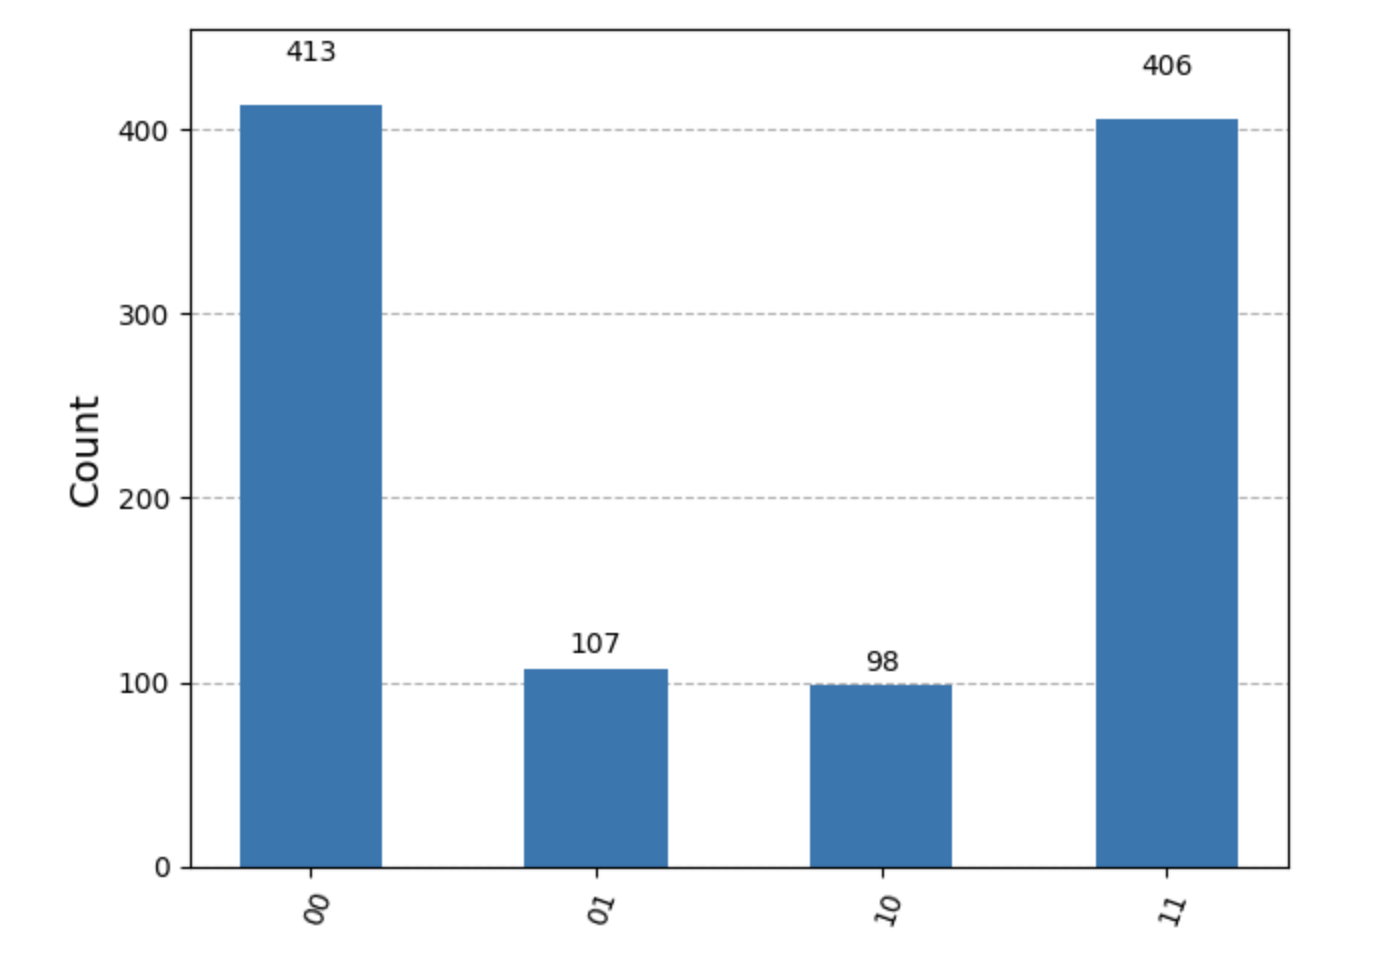

- `Estimator` primitive - returns the expectation value of an observable. E.g.:
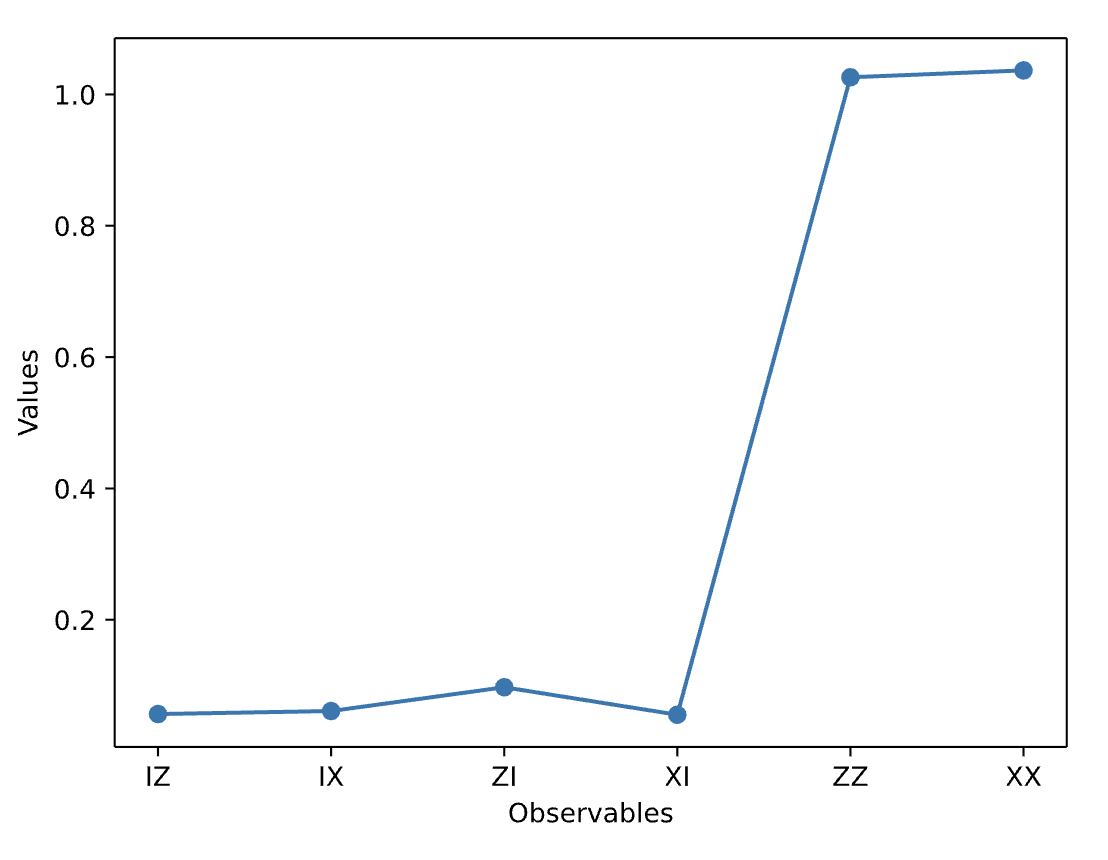




We'll be using the Sampler today, so we need to add measurement gates to our circuit.

In [ ]:
# Use measure_all, which adds a barrier, applies measurement gates on all qubits, creates a classical register called `meas`
qc.measure_all()
qc.draw('mpl')

### Step 2. Optimize the circuits for the target hardware

When executing circuits on a device, it is important to optimize the set of instructions that the circuit contains and minimize the overall depth (roughly the number of instructions) of the circuit. This ensures that you obtain the best results possible by reducing the effects of error and noise. Additionally, the circuit's instructions must conform to a backend device's [Instruction Set Architecture (ISA)](https://docs.quantum.ibm.com/guides/transpile#instruction-set-architecture) and must consider the device's basis gates and qubit connectivity.

The following code instantiates a simulator to submit a job to and transforms the circuit and observables to match that backend's ISA. Note that we will use a real device later.

In [ ]:
# option:
from qiskit_ibm_runtime.fake_provider import FakeTorino
backend = FakeTorino()

In [ ]:
print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"Native gate set: {backend.operation_names}\n"
)

#to view other properties you can use properties()
# refer to https://docs.quantum.ibm.com/guides/get-qpu-information

In [ ]:
# Convert to an ISA circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

isa_circuit_sampler = pm.run(qc)

isa_circuit_sampler.draw("mpl", idle_wires=False)

### Step 3. Execute using the Qiskit primitives

Quantum computers can produce random results, so you usually collect a sample of the outputs by running the circuit many times. You can estimate the value of the observable by using the `Estimator` class. `Sampler` can be used to get data from a quantum computer.  These objects possess a `run()` method that executes the selection of circuits, observables, and parameters (if applicable), using a [primitive unified bloc (PUB).](https://docs.quantum.ibm.com/guides/primitive-input-output#pubs)



In [ ]:
# Create a sampler instance using the selected backend
sampler = Sampler(backend)

# Run the sampler primitive on ISA circuit for specified number of shots (1024)

job_sampler = sampler.run([isa_circuit_sampler], shots=1024)

# Save the result of the job

result_sampler = job_sampler.result()

### Step 4. Post-process the results

This step involves postprocessing your results. You might feed these results into another workflow for further analysis or prepare a plot of the key values and data. In general, this step is specific to your problem.  

- For the `Sampler`, we plot the probability distribution obtained by sampling the quantum circuit as many times as the shots you specified using `plot_histogram`.

In [ ]:
from qiskit.visualization import plot_histogram

counts = result_sampler[0].data.meas.get_counts()
# Note: meas is the default name of the classical register when using measure_all().
# If you specify a classical register, then use the name you assign

# Plot the result
plot_histogram(counts)


# Run a program on a real device <a id="real-device"></a>

 If you'd like to run this code on a real device, you can use the following code. 



In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# View the list of backends you have access to

service = QiskitRuntimeService()

service.backends()

In [ ]:
# Get backend
backend_real = service.least_busy(simulator=False, operational=True)

#backend_real = service.backend(name="insert_backend_name") # use this if you want to choose a specific backend

sampler = Sampler(backend_real)

pm = generate_preset_pass_manager(backend=backend_real, optimization_level=3)
isa_circuit = pm.run(qc)

job = sampler.run([isa_circuit], shots=1024)


In [ ]:
print(job.job_id)

In [ ]:
result = job.result()

In [ ]:
print(
    f"Name: {backend_real.name}\n"
    f"Version: {backend_real.version}\n"
    f"Native gate set: {backend_real.operation_names}\n"
)

In [ ]:
counts = result[0].data.meas.get_counts()

plot_histogram(counts)

### Fetching results from a completed job

The cell below demonstrates how you can fetch results from a completed job. 

In [ ]:
service = QiskitRuntimeService()
retrieved_job = service.job('d40mquhsg33c73dhhs00')
result = retrieved_job.result()
counts = result[0].data.meas.get_counts()
plot_histogram(counts)